In [1]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd

In [2]:
if __name__=='__main__':
    %matplotlib inline

In [3]:
if __name__=='__main__':
    dbname='wrc18.db'
    conn = sqlite3.connect(dbname)

    q="SELECT name FROM sqlite_master WHERE type = 'table';"
    display(pd.read_sql(q,conn))

,name
0,itinerary_event
1,itinerary_legs
2,itinerary_sections
3,itinerary_stages
4,itinerary_controls
5,startlists
6,startlist_classes
7,penalties
8,retirements
9,stagewinners


In [4]:
if __name__=='__main__':
    year=2018
    rc='RC2'
    ss='SS4'
    rally='Sweden'

    typ='stage_times_stage' #stage_times_stage stage_times_overall
    typ='stage_times_overall'

## Split times on a Stage

In [5]:
if __name__=='__main__':
    rc='RC1'

    q='''
    SELECT st.*, sc.name as class, i.code, i.distance, i.name, sl.`driver.code` drivercode
    FROM split_times st INNER JOIN itinerary_stages i ON st.stageid = i.stageid
    INNER JOIN startlist_classes sc ON sc.entryid = st.entryid 
    INNER JOIN championship_events ce ON i.eventId=ce.eventId
    INNER JOIN startlists sl ON sl.entryId=sc.entryId
    WHERE i.code="{ss}" AND sc.name="{rc}" AND ce.`country.name`="{rally}" ORDER BY startDateTime,entryId, splitDateTime
    '''.format(rc=rc,ss=ss, rally=rally)
    splits=pd.read_sql(q,conn)
    display(splits.head())
    

,elapsedDuration,elapsedDurationMs,entryId,splitDateTime,splitDateTimeLocal,splitPointId,splitPointTimeId,stageTimeDuration,stageTimeDurationMs,startDateTime,startDateTimeLocal,stageId,class,code,distance,name,drivercode
0,PT1M28.059S,88059,1574,2018-02-16T08:55:28.059Z,2018-02-16T09:55:28.059+01:00,661,16671,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI
1,PT4M11.143S,251143,1574,2018-02-16T08:58:11.143Z,2018-02-16T09:58:11.143+01:00,683,16503,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI
2,PT6M49.659S,409659,1574,2018-02-16T09:00:49.659Z,2018-02-16T10:00:49.659+01:00,688,16683,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI
3,PT9M5.5S,545500,1574,2018-02-16T09:03:05.5Z,2018-02-16T10:03:05.5+01:00,690,16690,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI
4,PT1M27.079S,87079,1581,2018-02-16T08:56:27.079Z,2018-02-16T09:56:27.079+01:00,661,16509,00:10:37.1000000,637100.0,2018-02-16T08:55:00,2018-02-16T09:55:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,TÄN


## Deltas within a particular sector

In [6]:
if __name__=='__main__':
    splits['splitDurationMs']=splits.groupby('drivercode')['elapsedDurationMs'].transform(pd.Series.diff)
    #splits.loc[0, 'splitDurationMs'] = splits['elapsedDurationMs'].iloc[0]
    #Set the value of the first difference to be the original split time
    splits.loc[splits.groupby('drivercode',as_index=False).head(1).index,'splitDurationMs'] = splits.loc[splits.groupby('drivercode',as_index=False).head(1).index,'elapsedDurationMs']
    splits['splitDurationS']=(splits['splitDurationMs']/1000).round(1)
    #splits['splitnum'] = splits.groupby('drivercode').cumcount()+1
    
    display(splits.head())

,elapsedDuration,elapsedDurationMs,entryId,splitDateTime,splitDateTimeLocal,splitPointId,splitPointTimeId,stageTimeDuration,stageTimeDurationMs,startDateTime,startDateTimeLocal,stageId,class,code,distance,name,drivercode,splitDurationMs,splitDurationS
0,PT1M28.059S,88059,1574,2018-02-16T08:55:28.059Z,2018-02-16T09:55:28.059+01:00,661,16671,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI,88059.0,88.1
1,PT4M11.143S,251143,1574,2018-02-16T08:58:11.143Z,2018-02-16T09:58:11.143+01:00,683,16503,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI,163084.0,163.1
2,PT6M49.659S,409659,1574,2018-02-16T09:00:49.659Z,2018-02-16T10:00:49.659+01:00,688,16683,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI,158516.0,158.5
3,PT9M5.5S,545500,1574,2018-02-16T09:03:05.5Z,2018-02-16T10:03:05.5+01:00,690,16690,00:10:40.5000000,640500.0,2018-02-16T08:54:00,2018-02-16T09:54:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,OGI,135841.0,135.8
4,PT1M27.079S,87079,1581,2018-02-16T08:56:27.079Z,2018-02-16T09:56:27.079+01:00,661,16509,00:10:37.1000000,637100.0,2018-02-16T08:55:00,2018-02-16T09:55:00+01:00,301,RC1,SS4,19.13,SS4 Röjden 1,TÄN,87079.0,87.1


In [7]:
if __name__=='__main__':
    #Find the time for the last section - i.e. diff between stage time and final split time
    tmp = splits.groupby('drivercode', as_index=False).last()[['drivercode','stageTimeDurationMs','elapsedDurationMs', 'startDateTime' ]]
    tmp['splitDurationS']=((tmp['stageTimeDurationMs']-tmp['elapsedDurationMs'])/1000).round(1)
    display(tmp)

,drivercode,stageTimeDurationMs,elapsedDurationMs,startDateTime,splitDurationS
0,AL,687600.0,594275,2018-02-16T09:20:00,93.3
1,BRE,621900.0,533370,2018-02-16T09:10:00,88.5
2,EVA,689800.0,577005,2018-02-16T09:03:00,112.8
3,LAP,621400.0,532025,2018-02-16T09:06:00,89.4
4,LAT,625900.0,533383,2018-02-16T08:58:00,92.5
5,MEE,633900.0,540520,2018-02-16T09:00:00,93.4
6,MIK,618500.0,529534,2018-02-16T09:08:00,89.0
7,NEU,620400.0,530569,2018-02-16T09:02:00,89.8
8,OGI,640500.0,545500,2018-02-16T08:54:00,95.0
9,OST,620700.0,532727,2018-02-16T09:16:00,88.0


In [8]:
if __name__=='__main__':
    cols = ['drivercode','splitDurationS', 'startDateTime','stageTimeDurationMs']
    splitdurations = pd.concat([splits[cols],tmp[cols]]).reset_index(drop=True)
    splitdurations['section'] = splitdurations.groupby('drivercode').cumcount()+1
    splitdurations = splitdurations.sort_values(['startDateTime','drivercode','section'])
    display(splitdurations.head())

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section
0,OGI,88.1,2018-02-16T08:54:00,640500.0,1
1,OGI,163.1,2018-02-16T08:54:00,640500.0,2
2,OGI,158.5,2018-02-16T08:54:00,640500.0,3
3,OGI,135.8,2018-02-16T08:54:00,640500.0,4
63,OGI,95.0,2018-02-16T08:54:00,640500.0,5


### Make That a Function

In [9]:
def dbGetSplits(conn,rally,ss,rc='RC1'):
    _rc =' AND sc.name="{rc}" '.format(rc=rc) if rc is not None else ''
    q='''
    SELECT st.*, sc.name as class, i.code, i.distance, i.name, sl.`driver.code` drivercode
    FROM split_times st INNER JOIN itinerary_stages i ON st.stageid = i.stageid
    INNER JOIN startlist_classes sc ON sc.entryid = st.entryid 
    INNER JOIN championship_events ce ON i.eventId=ce.eventId
    INNER JOIN startlists sl ON sl.entryId=sc.entryId
    WHERE i.code="{ss}" {rc} AND ce.`country.name`="{rally}" ORDER BY startDateTime,entryId, splitDateTime
    '''.format(rc=_rc,ss=ss, rally=rally)
    splits=pd.read_sql(q,conn)
    return splits

def _getSplitDurationsFromSplits(splits):
        
    splits['splitDurationMs']=splits.groupby('drivercode')['elapsedDurationMs'].transform(pd.Series.diff)
    #Set the value of the first difference to be the original split time
    splits.loc[splits.groupby('drivercode',as_index=False).head(1).index,'splitDurationMs'] = splits.loc[splits.groupby('drivercode',as_index=False).head(1).index,'elapsedDurationMs']
    splits['splitDurationS']=(splits['splitDurationMs']/1000).round(1)

    #Find the time for the last section - i.e. diff between stage time and final split time
    tmp = splits.groupby('drivercode', as_index=False).last()[['drivercode','stageTimeDurationMs','elapsedDurationMs', 'startDateTime' ]]
    tmp['splitDurationS']=((tmp['stageTimeDurationMs']-tmp['elapsedDurationMs'])/1000).round(1)

    cols = ['drivercode','splitDurationS', 'startDateTime','stageTimeDurationMs']
    splitdurations = pd.concat([splits[cols],tmp[cols]]).reset_index(drop=True)
    splitdurations['section'] = splitdurations.groupby('drivercode').cumcount()+1
    splitdurations = splitdurations.sort_values(['startDateTime','drivercode','section'])

    return splitdurations

def getSplitDurationsFromSplits(conn,rally,ss,rc='RC1'):
    splits = dbGetSplits(conn,rally,ss,rc='RC1')
    if splits.empty: return splits
    return _getSplitDurationsFromSplits(splits)

In [10]:
if __name__=='__main__':
    display(getSplitDurationsFromSplits(conn,rally,ss).head())

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section
0,OGI,88.1,2018-02-16T08:54:00,640500.0,1
1,OGI,163.1,2018-02-16T08:54:00,640500.0,2
2,OGI,158.5,2018-02-16T08:54:00,640500.0,3
3,OGI,135.8,2018-02-16T08:54:00,640500.0,4
63,OGI,95.0,2018-02-16T08:54:00,640500.0,5


## Rebasing

The aim of rebasing is to derive time deltas for one car relative to times recorded by an arbitrary other car.

The first step is to capture the base times for the target vehicle, relative to which rebased times will be calculated.

In [11]:
if __name__=='__main__':
    drivercode = 'OGI'

    rebase = splitdurations[splitdurations['drivercode']==drivercode][['section','splitDurationS']].set_index('section').to_dict(orient='dict')['splitDurationS']
    display(rebase)

{1: 88.1, 2: 163.1, 3: 158.5, 4: 135.8, 5: 95.0}

The base times are then subtracted from the corresponding times for each other car.

In [12]:
if __name__=='__main__':
    splitdurations['rebased'] = splitdurations['splitDurationS'] - splitdurations['section'].map(rebase)

In [13]:
if __name__=='__main__':
    splitdurations['section'] = splitdurations['section']#.astype(str)
    display(splitdurations.head())

,drivercode,splitDurationS,startDateTime,stageTimeDurationMs,section,rebased
0,OGI,88.1,2018-02-16T08:54:00,640500.0,1,0.0
1,OGI,163.1,2018-02-16T08:54:00,640500.0,2,0.0
2,OGI,158.5,2018-02-16T08:54:00,640500.0,3,0.0
3,OGI,135.8,2018-02-16T08:54:00,640500.0,4,0.0
63,OGI,95.0,2018-02-16T08:54:00,640500.0,5,0.0


### Make That a Function

In [14]:
def rebaseSplitDurations(splitdurations, drivercode=None):
    if drivercode is None: return splitdurations
    
    rebase = splitdurations[splitdurations['drivercode']==drivercode][['section','splitDurationS']].set_index('section').to_dict(orient='dict')['splitDurationS']
    splitdurations['rebased'] = splitdurations['splitDurationS'] - splitdurations['section'].map(rebase)
    return splitdurations
    

In [15]:
def rebaseSplitDurationsBest(splitdurations):
    
    #Note this ranking may include undesired drivers w/ bad data
    if 'sectorrank' not in splitdurations:
        splitdurations['sectorrank']=splitdurations.groupby(['section'])['splitDurationS'].rank(method='dense').astype(int)

    rebase = splitdurations[splitdurations['sectorrank']==1][['section','splitDurationS']].set_index('section').to_dict(orient='dict')['splitDurationS']
    splitdurations['rebased'] = splitdurations['splitDurationS'] - splitdurations['section'].map(rebase)

    sectorPurpleDriver = splitdurations[splitdurations['sectorrank']==1][['section','drivercode']].set_index('section').to_dict(orient='dict')['drivercode']
    splitdurations['sectorBestDriver'] = splitdurations['section'].map(sectorPurpleDriver)
    return splitdurations


We can define a sort order for the display of times grouped by drivers.

## Plot Split Derived Sectors

In [16]:
if __name__=='__main__':
    order = splitdurations.sort_values(['stageTimeDurationMs','drivercode'])['drivercode'].unique().tolist()

In [17]:
if __name__=='__main__':
    pass
    #rebaseSplitDurations(splitdurations, drivercode=None).pivot('drivercode','section','rebased')

In [18]:
if __name__=='__main__':
    display(splitdurations.pivot('drivercode','section','rebased'))

section,1,2,3,4,5
drivercode,,,,,
AL,10.2,19.2,16.2,3.2,-1.7
BRE,-0.4,-0.7,-2.8,-8.3,-6.5
EVA,1.0,0.5,7.7,22.3,17.8
LAP,158.4,-6.8,-29.3,-46.4,NaN
LAT,-0.8,-2.0,-3.3,-6.0,-2.5
MEE,0.2,0.3,-0.8,-4.7,-1.6
MIK,-1.5,-3.0,-2.8,-8.6,-6.0
NEU,-2.5,-1.3,-3.3,-7.8,-5.2
OGI,0.0,0.0,0.0,0.0,0.0


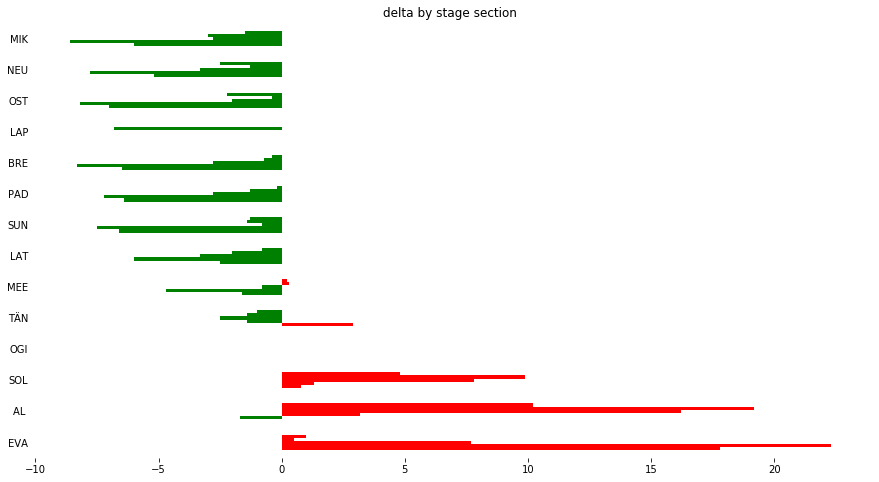

In [19]:
if __name__=='__main__':
    fig, ax = plt.subplots(figsize=(15,8))
    ax.yaxis.label.set_visible(False)
    ax.tick_params(axis='y', which='both',length=0)

    zz=splitdurations[splitdurations['rebased'].abs()<25].pivot('drivercode','section','rebased')
    #zz['stagediff']=zz.sum(axis=1)
    #zz = zz.sort_values('stagediff',ascending=True).drop(['stagediff'], axis=1)
    zz=zz.reindex(order)


    #Define a color map for the bars
    #This is based on generating a list of lists.
    #The outer list represents the cars; each inner list represents the bar colours grouped for each car.
    #In this case, we define colours based on positive or negative deltas relative to the target car.
    cmap=[]
    for col in zz.columns:
        cmap.append( ['r' if x else 'g' for x in zz[col]>0 ] )

    zz.plot(kind='barh',title='delta by stage section',color=cmap,ax=ax, legend=False).invert_yaxis()

    #Hide outer box
    plt.box(on=None)


In the above chart, we see times relative to OGI. The drivers are ordered based on overall stage time. The grouped bars show the delta to the target driver within each "sector" of the stage, with the first sector at the top of the grouping and the last sector at the bottom.

In this case, we see OGI lost time on each sector relative to 7 of the top 8 cars (in this particular example, the times for LAP appear to be corrupt).

The color selection reflects the perspective with which we read the chart. In the above case, the red colour indicates that the target drive lost time compared to the drivers ahead on the stage. The negative x-axis time shoud be read as indicating that the the driver lost that amount of time relative those cars (i.e. the target river is negatively affected by those times).

The green colouring suggests that the target driver *gained* time against the lesser ranked cars, making up "positive" seconds against them.

In [20]:
if __name__=='__main__':
    zz.columns=['SS{}'.format(c) for c in zz.columns]
    display(zz.head())

,SS1,SS2,SS3,SS4,SS5
drivercode,,,,,
MIK,-1.5,-3.0,-2.8,-8.6,-6.0
NEU,-2.5,-1.3,-3.3,-7.8,-5.2
OST,-2.2,-0.4,-2.0,-8.2,-7.0
LAP,NaN,-6.8,NaN,NaN,NaN
BRE,-0.4,-0.7,-2.8,-8.3,-6.5


In [21]:
if __name__=='__main__':
    #This requires all the split times to be in
    #zz['total']=zz.sum(axis=1)
    #Better to use the actual stage delta time?
    zz['total']=(splitdurations[['drivercode','stageTimeDurationMs']].drop_duplicates().set_index('drivercode')/1000).round(1)
    rebase = ((splitdurations[splitdurations['drivercode']==drivercode][['section','stageTimeDurationMs']].iloc[0]['stageTimeDurationMs'])/1000).round(1)
    zz['total'] = zz['total'] - rebase 
    display(zz.head())

,SS1,SS2,SS3,SS4,SS5,total
drivercode,,,,,,
MIK,-1.5,-3.0,-2.8,-8.6,-6.0,-22.0
NEU,-2.5,-1.3,-3.3,-7.8,-5.2,-20.1
OST,-2.2,-0.4,-2.0,-8.2,-7.0,-19.8
LAP,NaN,-6.8,NaN,NaN,NaN,-19.1
BRE,-0.4,-0.7,-2.8,-8.3,-6.5,-18.6


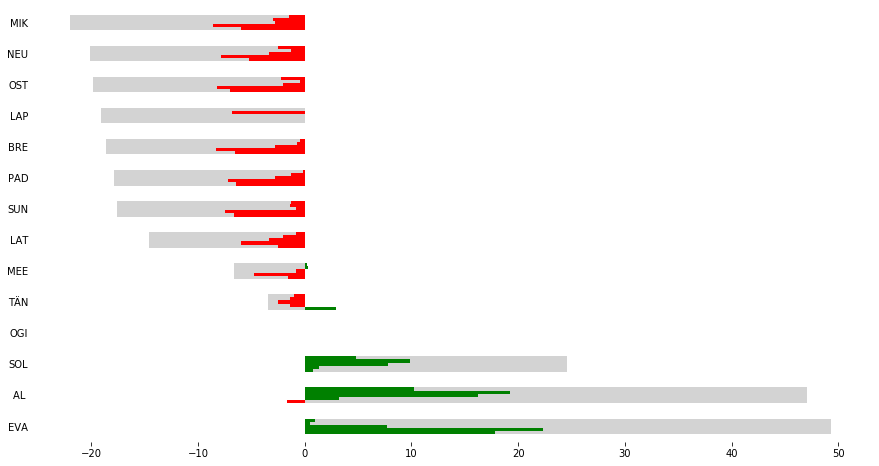

In [22]:
if __name__=='__main__':
    fig, ax = plt.subplots(figsize=(15,8))
    ax.yaxis.label.set_visible(False)
    ax.tick_params(axis='y', which='both',length=0)

    #Define a color map for the bars
    #This is based on generating a list of lists.
    #The outer list represents the cars; each inner list represents the bar colours grouped for each car.
    #In this case, we define colours based on positive or negative deltas relative to the target car.
    cmap=[]

    cols=[c for c in zz.columns if c.startswith('SS')]
    for col in cols:
        cmap.append( ['g' if x else 'r' for x in zz[col]>0 ] )

    zz['total'].plot(kind='barh',ax=ax, color='lightgrey',legend=False)

    zz[cols].plot(kind='barh',color=cmap,ax=ax, legend=False).invert_yaxis()

    #Hide outer box
    plt.box(on=None)


### Make Functions of Those

In [ ]:
def limitAxes(ax, xmin, xmax):
    ''' Set axis limits, sensitive to whether they are inverted'''
    (minx,maxx) = ax.get_xlim()
    inverted = minx>maxx
    if xmax:
        if inverted:
            if minx>xmax: ax.set_xlim((xmax,maxx))
        elif maxx>xmax: ax.set_xlim((minx,xmax))
    if xmin:
        if inverted:
            if maxx<xmin: ax.set_xlim((minx,xmin))
        elif minx<xmin: ax.set_xlim((xmin,maxx)) 

In [23]:
def getSplitOrderByStageTimeDuration(splitdurations):
    return splitdurations.sort_values(['stageTimeDurationMs','drivercode'])['drivercode'].unique().tolist()

def plotSplitSectionDelta(splitdurations, drivercode=None, order=None,
                          fig=None,ax=None, alpha=1, pos='r', neg='g', total=False,invert_yaxis=True,
                          ignoresplitsfordrivercodes=None, invert_colours=False, maxdelta=None, 
                          title='Delta within each split', xmin=None, xmax=None):

    if invert_colours:
        pos,neg=neg,pos
        
    splitdurations = rebaseSplitDurations(splitdurations, drivercode)
    if 'rebased' not in splitdurations: return
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(15,8))
        
        ax.yaxis.label.set_visible(False)
        ax.tick_params(axis='y', which='both',length=0)
        #Hide outer box
        plt.box(on=None)

    #zz=splitdurations[splitdurations['rebased'].abs()<25].pivot('drivercode','section','rebased')
    zz=splitdurations.pivot('drivercode','section','rebased')
    #This gives columns:
    
    if order is None:
        order = getSplitOrderByStageTimeDuration(splitdurations)
    zz=zz.reindex(order)
    
    if total:
        #zz.sum(axis=1).plot(kind='barh',ax=ax, color='lightgrey',legend=False)
        _total=(splitdurations[['drivercode','stageTimeDurationMs']].drop_duplicates().set_index('drivercode')/1000).round(1)
        rebase = ((splitdurations[splitdurations['drivercode']==drivercode][['section','stageTimeDurationMs']].iloc[0]['stageTimeDurationMs'])/1000).round(1)
        _total = _total - rebase 
        _total.reindex(order).plot(kind='barh',ax=ax, color='lightgrey',legend=False)

    if ignoresplitsfordrivercodes is not None:
        ignoresplitsfordrivercodes = [ignoresplitsfordrivercodes] if not isinstance(ignoresplitsfordrivercodes,list) else ignoresplitsfordrivercodes
        zz = zz[~zz.index.isin(ignoresplitsfordrivercodes)]
        
    cmap=[]
    
    #Need to set the column order to plot splits correctly
    cols=zz.columns[::-1] if not invert_yaxis else zz.columns
    
    for col in cols:
        cmap.append( [pos if x else neg for x in zz[col]>0 ] )
    
    tmp = zz[cols].plot(kind='barh',color=cmap,legend=False,alpha=alpha,ax=ax, title=title)
    if invert_yaxis: tmp.invert_yaxis()
     
    #Maxdelta is equivalent to setting the same limit on xmin and xmax
    #but this doesn't take into account possible axis inversion?
    if maxdelta is not None:
        (xlimlow,xlimhigh) = ax.get_xlim()
        if xlimlow<-maxdelta: xlimlow=-maxdelta
        if xlimhigh>maxdelta: xlimhigh=maxdelta
        ax.set_xlim(xlimlow,xlimhigh)
    
    limitAxes(ax, xmin, xmax)
    
    return fig,ax

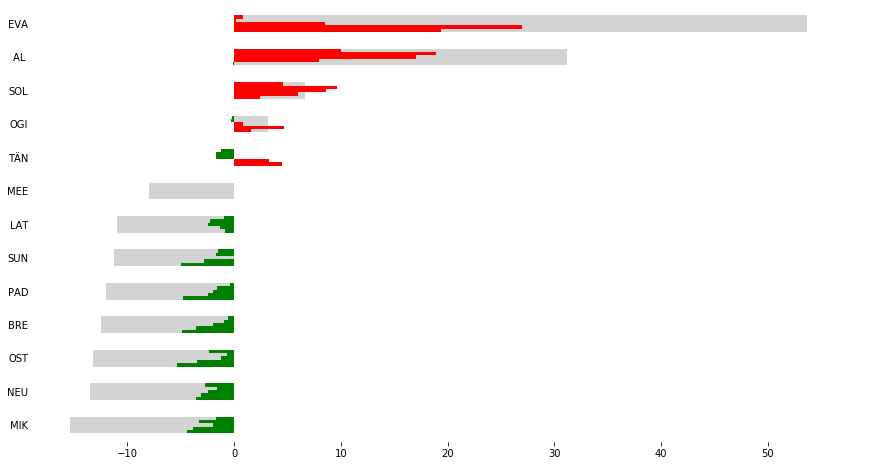

In [24]:
if __name__=='__main__':
    plotSplitSectionDelta(splitdurations,'MEE',total=True,invert_yaxis=False, ignoresplitsfordrivercodes='LAP');

## Running Time Deltas at each split

In [25]:
if __name__=='__main__':
    splits['elapsedDurationS'] = (splits['elapsedDurationMs']/1000).round(1)

    #Find the time for the last section - i.e. diff between stage time and final split time
    tmp = splits.groupby('drivercode', as_index=False).last()[['drivercode','stageTimeDurationMs','elapsedDurationMs', 'startDateTime' ]]
    tmp['elapsedDurationS']=((tmp['stageTimeDurationMs'])/1000).round(1)

    cols = ['drivercode','elapsedDurationS', 'startDateTime']
    elapseddurations = pd.concat([splits[cols],tmp[cols]]).reset_index(drop=True)
    elapseddurations['section'] = elapseddurations.groupby('drivercode').cumcount()+1
    elapseddurations = elapseddurations.sort_values(['startDateTime','drivercode','section'])
    elapseddurations = elapseddurations
    display(elapseddurations.head())


,drivercode,elapsedDurationS,startDateTime,section
0,OGI,88.1,2018-02-16T08:54:00,1
1,OGI,251.1,2018-02-16T08:54:00,2
2,OGI,409.7,2018-02-16T08:54:00,3
3,OGI,545.5,2018-02-16T08:54:00,4
63,OGI,640.5,2018-02-16T08:54:00,5


In [26]:
if __name__=='__main__':
    order = splits.sort_values(['stageTimeDurationMs','drivercode'])['drivercode'].unique().tolist()
    display(order)

['MIK',
 'NEU',
 'OST',
 'LAP',
 'BRE',
 'PAD',
 'SUN',
 'LAT',
 'MEE',
 'TÄN',
 'OGI',
 'SOL',
 'AL ',
 'EVA']

In [27]:
if __name__=='__main__':
    drivercode = 'OGI'

    rebase = elapseddurations[elapseddurations['drivercode']==drivercode][['section','elapsedDurationS']].set_index('section').to_dict(orient='dict')['elapsedDurationS']
    display(rebase)

{1: 88.1, 2: 251.1, 3: 409.7, 4: 545.5, 5: 640.5}

In [28]:
if __name__=='__main__':
    elapseddurations['rebased']=elapseddurations['elapsedDurationS']-elapseddurations['section'].map(rebase)
    elapseddurations['section']=elapseddurations['section']#.astype(str)

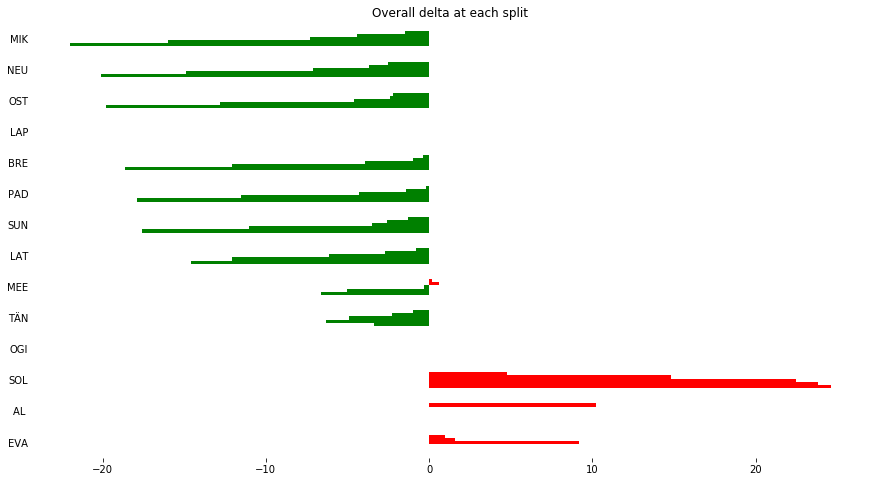

In [29]:
if __name__=='__main__':
    fig, ax = plt.subplots(figsize=(15,8))
    ax.yaxis.label.set_visible(False)
    ax.tick_params(axis='y', which='both',length=0)


    zzz=elapseddurations[elapseddurations['rebased'].abs()<25].pivot('drivercode','section','rebased')
    #zz['stagediff']=zz.sum(axis=1)
    #zz = zz.sort_values('stagediff',ascending=True).drop(['stagediff'], axis=1)


    cmap=[]


    zzz=zzz.reindex(order)
    for col in zzz.columns:
        cmap.append( ['r' if x else 'g' for x in zzz[col]>0 ] )

    zzz.plot(kind='barh',title='Overall stage delta at each split',color=cmap,legend=False,ax=ax).invert_yaxis()

    #Hide outer box
    plt.box(on=None)

In [30]:
if __name__=='__main__':
    order2=elapseddurations[elapseddurations['section']==elapseddurations['section'].max()].sort_values(['elapsedDurationS','drivercode'])['drivercode'].unique().tolist()
    display(order2)

['MIK',
 'NEU',
 'OST',
 'BRE',
 'PAD',
 'SUN',
 'LAT',
 'MEE',
 'TÄN',
 'OGI',
 'SOL',
 'AL ',
 'EVA']

### Make a Function of That

In [31]:
def getElapsedDurations(splits):

    splits['elapsedDurationS'] = (splits['elapsedDurationMs']/1000).round(1)

    #Find the time for the last section - i.e. diff between stage time and final split time
    tmp = splits.groupby('drivercode', as_index=False).last()[['drivercode','stageTimeDurationMs','elapsedDurationMs', 'startDateTime' ]]
    tmp['elapsedDurationS']=((tmp['stageTimeDurationMs'])/1000).round(1)

    cols = ['drivercode','elapsedDurationS', 'startDateTime']
    elapseddurations = pd.concat([splits[cols],tmp[cols]]).reset_index(drop=True)
    elapseddurations['section'] = elapseddurations.groupby('drivercode').cumcount()+1
    elapseddurations = elapseddurations.sort_values(['startDateTime','drivercode','section'])

    return elapseddurations

def rebaseElapsedDurations(elapseddurations, drivercode=None):
    if drivercode is None: return elapseddurations
    rebase = elapseddurations[elapseddurations['drivercode']==drivercode][['section','elapsedDurationS']].set_index('section').to_dict(orient='dict')['elapsedDurationS']
    elapseddurations['rebased']=elapseddurations['elapsedDurationS']-elapseddurations['section'].map(rebase)
    return elapseddurations

def plotSplitOverallDelta(elapseddurations,drivercode=None, order=None, fig=None, ax=None,
                          alpha=1, pos='r', neg='g',invert_yaxis=True, invert_colours=False,
                          xmin=None, xmax=None, **kwargs):

    if invert_colours:
        pos,neg=neg,pos
        
    elapseddurations = rebaseElapsedDurations(elapseddurations, drivercode)
    if 'rebased' not in elapseddurations: return
        
    if ax is None:
        fig, ax = plt.subplots(figsize=(15,8))
        
        ax.yaxis.label.set_visible(False)
        ax.tick_params(axis='y', which='both',length=0)

    zz=elapseddurations[elapseddurations['rebased'].abs()<25].pivot('drivercode','section','rebased')

    cmap=[]

    if order is None:
        order=elapseddurations[elapseddurations['section']==elapseddurations['section'].max()].sort_values(['elapsedDurationS','drivercode'])['drivercode'].unique().tolist()

    zz=zz.reindex(order)
    for col in zz.columns:
        cmap.append( [pos if x else neg for x in zz[col]>0 ] )

    tmp = zz.plot(kind='barh',title='Overall delta at each split',color=cmap,legend=False,ax=ax)

    if invert_yaxis: tmp.invert_yaxis()
        
    #Hide outer box
    plt.box(on=None)
    
    limitAxes(ax, xmin, xmax)
    
    if kwargs is not None and 'filename' in kwargs:
        fig.savefig(kwargs['filename'])
        
    return fig, ax

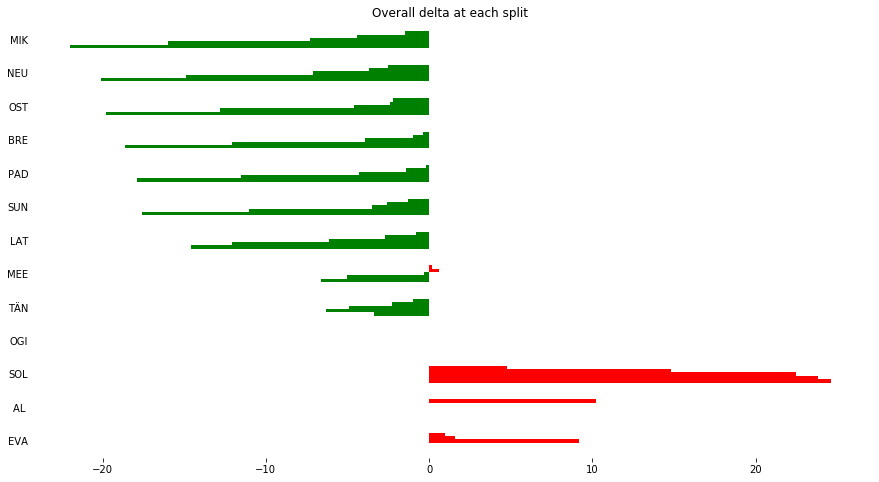

In [32]:
if __name__=='__main__':
    plotSplitOverallDelta(elapseddurations,'OGI');